Mutations can be added during the course of an simulation.   
These may change the cell fitness and therefore the cell behaviour. 

There are many things that can be defined for the mutations:
- the mutation rate
- the proportions of synonymous and non-synonymous mutations
- the distribution of fitness effects for non-synonymous mutations
- how the effects of multiple mutations combine to produce the overall cell fitness

This last point is very complicated and is covered in more detail in other tutorial notebooks. 

This notebook describes the basics of using mutations in simulations. 

In [1]:
%matplotlib inline
import numpy as np

In [2]:
from clone_competition_simulation import Parameters

# Setting the mutation rate

<AxesSubplot:>

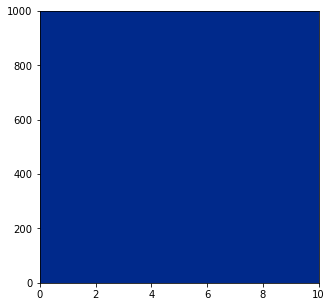

In [3]:
# If no mutation_rates is defined, no mutations occur
p = Parameters(algorithm='Moran', initial_cells=1000, print_warnings=False)
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(5, 5))
# This is just a single colour, because there is a single clone (the initial clone of 1000 cells)

<AxesSubplot:>

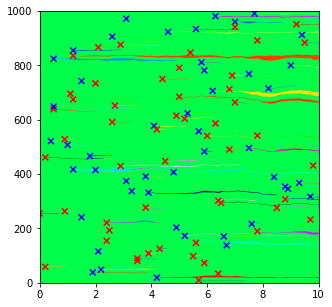

In [4]:
# Setting a non-zero mutation_rates randomly introduces mutations
# The value is the probability mutations per cell division. 
p = Parameters(algorithm='Moran', initial_cells=1000, mutation_rates=0.01, print_warnings=False)
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(5, 5))
# The mutations that occur are marked with a X and are followed by the clones they form. 
# Red Xs mark non-synonymous mutations and blue Xs mark synonymous mutations

<AxesSubplot:>

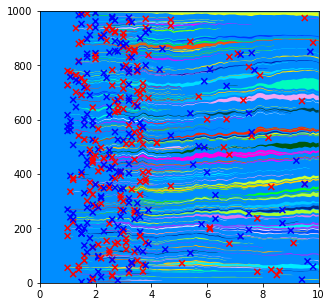

In [5]:
# The mutation rate can vary. 
# Here we set a high mutation rate from time 1 until time 3 and then a lower mutation rate after that

# The mutation_rates are set as a list/array of pairs of [start_time, mutation_rate]
# The mutation_rate will apply until the next start_time point or until the end of the simulation.
# Before the first start_time (if not zero) the mutation_rate is zero. 
p = Parameters(algorithm='Moran', initial_cells=1000, 
               mutation_rates=[
                   [1, 0.1],  # At time 1, start a mutation rate of 0.1 per cell division
                   [4, 0.01]  # At time 4, start a mutation rate of 0.01 per cell division. This continues until the end.
                   ], 
               print_warnings=False)
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(5, 5))
# Can see the higher density of mutations between times 1 and 4. 

# Controlling the mutation effects

The fitness effects of mutations are defined in two classes: Gene and MutationGenerator.  

Gene is used to define the proportion of non-synonymous and synonymous mutations and the distribution of fitness effects of the non-synonymous mutations. 

The MutationGenerator is used to define how multiple mutations (which can be from multiple genes) combine to form the overall cell fitness.   

In this notebook, we will only use the default parameters from the MutationGenerator, which is that all fitness effects are multiplied together.  
More options are described in other tutorial notebooks. 


In [6]:
from clone_competition_simulation import Gene, MutationGenerator
from clone_competition_simulation import UniformDist, NormalDist, ExponentialDist, FixedValue

In [7]:
# Let's define a new gene
gene1 = Gene(
    'Gene1',  # This is the name for the gene. 
    UniformDist(0.5, 1.5),  # This defines the fitness effects of non-synonymous mutations
    synonymous_proportion=0.4   # This means 40% of the mutations will be synonymous
)

In [8]:
# And use that gene in a simulations
mut_gen = MutationGenerator(genes=[gene1])
np.random.seed(0)
p = Parameters(algorithm='Moran2D', initial_cells=100, 
               mutation_generator=mut_gen, mutation_rates=0.01,  # Pass the MutationGenerator to Parameters
               print_warnings=False
              )
s = p.get_simulator()
s.run_sim()
s.view_clone_info()
# The fitness values of the new clones are between 0.5 and 1.5, and the gene mutated is Gene1. 
# Some mutations will be synonymous and will not change the fitness

,clone id,label,fitness,generation born,parent clone id,last gene mutated
0,0,0,1.000000,0,-1,None
1,1,0,1.000000,15,0,Gene1
2,2,0,1.000000,21,0,Gene1
3,3,0,1.339029,42,0,Gene1
4,4,0,0.933265,45,0,Gene1
5,5,0,0.942416,48,0,Gene1
6,6,0,0.876017,60,0,Gene1
7,7,0,1.339029,62,3,Gene1
8,8,0,0.942416,76,5,Gene1
9,9,0,0.643681,97,0,Gene1


There are a few options for the distribution of fitness effects.  
Other distribution classes can be used as long as they have:
- a __call__ function that doesn't take any argument and returns a fitness value
- a get_mean function that returns the mean of the distribution  

We can run a simulation with multiple genes showing some of the options already available.   

In [9]:
# One with a normal distribution
gene_norm = Gene('GeneNorm', NormalDist(mean=0.6, var=0.1), synonymous_proportion=0.5)

# One with an exponential distribution
gene_exp = Gene('GeneExp', ExponentialDist(mean=1.05, offset=1), synonymous_proportion=0.4)

# One where every non-synonymous mutation has the same fixed value of fitness
gene_fix = Gene('GeneFix', FixedValue(value=1.01), synonymous_proportion=0.3)

mut_gen = MutationGenerator(genes=[gene1, gene_norm, gene_exp, gene_fix])
np.random.seed(0)
p = Parameters(algorithm='Moran2D', initial_cells=100, 
               mutation_generator=mut_gen, mutation_rates=0.03,
               print_warnings=False
              )
s = p.get_simulator()
s.run_sim()
s.view_clone_info()

,clone id,label,fitness,generation born,parent clone id,last gene mutated
0,0,0,1.000000,0,-1,None
1,1,0,1.010000,3,0,GeneFix
2,2,0,1.000000,6,0,GeneNorm
3,3,0,1.010000,7,0,GeneFix
4,4,0,1.034740,7,0,GeneExp
5,5,0,1.010000,15,0,GeneFix
6,6,0,0.516414,16,0,GeneNorm
7,7,0,1.000000,21,0,GeneFix
8,8,0,1.110256,27,0,GeneExp
9,9,0,1.000000,28,0,GeneNorm


To give different genes different mutation rates you can use the weight argument in Gene.  
The weights can be any non-negative number.  

The overall mutation rate is controlled by the Parameters mutations_rates argument.  
The Gene weight controls the relative mutation rate of the genes.  
By default weight=1, so all genes will have the same mutation rate.   

In [10]:
# Two genes, where gene1 is 3 times more likely to be mutated than gene2
gene1 = Gene('Gene1',  UniformDist(0.5, 1.1), synonymous_proportion=0.4, weight=3)
gene2 = Gene('Gene2',  UniformDist(1.1, 1.5), synonymous_proportion=0.4, weight=1)

mut_gen = MutationGenerator(genes=[gene1, gene2])
p = Parameters(algorithm='Moran2D', initial_cells=100, 
               mutation_generator=mut_gen, mutation_rates=0.1,
               print_warnings=False
              )
s = p.get_simulator()
s.run_sim()
s.view_clone_info()['last gene mutated'].value_counts()

Gene1    75
Gene2    16
Name: last gene mutated, dtype: int64

## dN/dS

The use of synonymous and non-synonymous mutations means we can calculate a dN/dS value.   
This can be done for the entire simulation or for each gene. 

In [11]:
gene1 = Gene('Gene1',  UniformDist(0.5, 1.1), synonymous_proportion=0.4, weight=3)
gene2 = Gene('Gene2',  UniformDist(1.1, 1.5), synonymous_proportion=0.5, weight=1)

mut_gen = MutationGenerator(genes=[gene1, gene2])
p = Parameters(algorithm='Moran2D', initial_cells=62500, 
               mutation_generator=mut_gen, mutation_rates=0.01,
               print_warnings=False
              )
s = p.get_simulator()
s.run_sim()

In [12]:
# Just running the function returns the overall dN/dS ratio at the end of the simulation
s.get_dnds()

1.0231533250016447

In [13]:
# Adding a time gets the dN/dS at that time point
s.get_dnds(t=5)

0.9779496754690142

In [14]:
# You can also get the dN/dS for each gene
s.get_dnds(gene='Gene1'), s.get_dnds(gene='Gene2') 

(0.9395973154362416, 1.3317757009345794)

In [15]:
# For sequencing experiments, you usually cannot detect very small clones. 
# Get get the dN/dS for larger clones only
s.get_dnds(gene='Gene2', min_size=5) 

1.8591549295774648

/Users/mh28/PycharmProjects/clone-competition-simulation/clone_competition_simulation/general_sim_class.py:835: RuntimeWarning: invalid value encountered in double_scalars
  dnds = total_ns / expected_ns


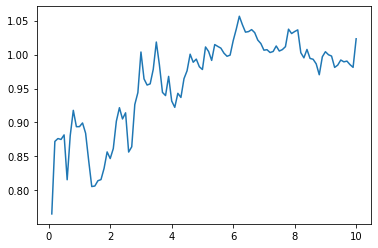

In [16]:
# You can plot the dN/dS over time. 
# The early time points are not reliable due to low sample size
s.plot_dnds()

/Users/mh28/PycharmProjects/clone-competition-simulation/clone_competition_simulation/general_sim_class.py:835: RuntimeWarning: invalid value encountered in double_scalars
  dnds = total_ns / expected_ns
/Users/mh28/PycharmProjects/clone-competition-simulation/clone_competition_simulation/general_sim_class.py:835: RuntimeWarning: invalid value encountered in double_scalars
  dnds = total_ns / expected_ns


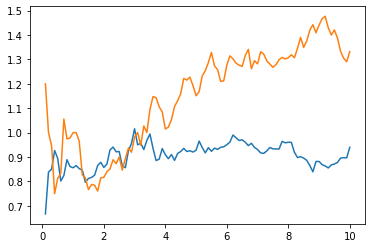

In [17]:
s.plot_dnds(gene='Gene1')
s.plot_dnds(gene='Gene2', clear_previous=False)

/Users/mh28/PycharmProjects/clone-competition-simulation/clone_competition_simulation/general_sim_class.py:835: RuntimeWarning: invalid value encountered in double_scalars
  dnds = total_ns / expected_ns
/Users/mh28/PycharmProjects/clone-competition-simulation/clone_competition_simulation/general_sim_class.py:835: RuntimeWarning: divide by zero encountered in double_scalars
  dnds = total_ns / expected_ns


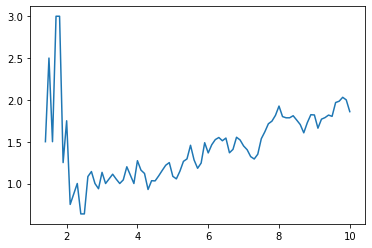

In [18]:
s.plot_dnds(gene='Gene2', min_size=5)